 ## Plan Analysis for Megaline telecom operator

## Introduction

 ### This is Staistical data analysis for different plans for Megaline telecom operator. In today's competitive telecom market, understanding which prepaid plans generate the most profit is crucial for effective marketing and resource allocation. This project aims to analyze the profitability of two prepaid plans offered by Megaline: Surf and Ultimate. By determining which plan yields higher profits, Megaline can make informed decisions on advertising channels and budget distribution. The data will be meticulously prepared to ensure that the final analysis is comprehensive and supports strategic decision-making for Megaline's corporate team.

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st


## Load data

In [2]:
# Loading the data files into different DataFrames
users= pd.read_csv('/datasets/megaline_users.csv', sep= ',')

In [3]:
plans= pd.read_csv('/datasets/megaline_plans.csv')

In [4]:
messages= pd.read_csv('/datasets/megaline_messages.csv')

In [5]:
internet= pd.read_csv('/datasets/megaline_internet.csv')

In [6]:
calls= pd.read_csv('/datasets/megaline_calls.csv')

##  Prepare the data

##  Plans

In [7]:
# general information about the plans' DataFrame
display(plans.head())
plans.info()  

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [8]:
# looking at a data sample in plans dataframe
plans.sample()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [9]:
# checking if there is any missing data in plans data frame
plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [10]:
# checking for duplicated rows
plans.duplicated().sum()

0    False
1    False
dtype: bool

##### When I look at general summary and data sample I do not see any issues as all the column names are lower case and there is no space between the column names it is separated by underscore. All the datatypes are correct based on entries as float is for US dollars and int for all the integers in plans dataframe. I also looked for missing values.

## Users

In [11]:
#  general information about the users' DataFrame
display(users.head())
users.info()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
# looking at a data sample in users dataframe
users.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
190,1190,Troy,Hutchinson,56,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",2018-08-01,ultimate,NaN


In [13]:
# checking for duplicated rows
users.duplicated().sum()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

### Fix Data

In [14]:
# checking if there is any missing data in users data frame
print(users['churn_date'].isna().sum())

466


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [15]:
# dropping missing data column in users data frame
users.drop('churn_date', axis= 1, inplace= True) # dropping the churn_date column as it has missing values because the plan is already discontinued
display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.5+ KB


None

## Initial observation of users data frame 

#### I found that in users data framethere is  churn_date columns which has 466 missing values so I dropped that column as it will not be beneficial for our analysis in this project.  These customers have stopped using our prepaid plan. 


## Calls

In [16]:
# general information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
# looking at a data sample in plans dataframe
calls.sample()

,id,user_id,call_date,duration
100946,1361_48,1361,2018-10-06,7.32


In [18]:
# looking for duplicate data
calls.duplicated().sum()

0         False
1         False
2         False
3         False
4         False
          ...  
137730    False
137731    False
137732    False
137733    False
137734    False
Length: 137735, dtype: bool

### Fix data

In [19]:
# rounding the duration
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


### Enrich data

In [20]:
# extracting just the month from date format
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month']= calls['call_date'].dt.month
calls.head


<bound method NDFrame.head of               id  user_id  call_date  duration  month
0        1000_93     1000 2018-12-27         9     12
1       1000_145     1000 2018-12-27        14     12
2       1000_247     1000 2018-12-27        15     12
3       1000_309     1000 2018-12-28         6     12
4       1000_380     1000 2018-12-30         5     12
...          ...      ...        ...       ...    ...
137730  1499_199     1499 2018-11-21         9     11
137731  1499_200     1499 2018-10-20        11     10
137732  1499_201     1499 2018-09-21         9      9
137733  1499_202     1499 2018-10-10         1     10
137734  1499_203     1499 2018-12-29        14     12

[137735 rows x 5 columns]>

## Initial observation of Calls data frame

#### Based on instructions in the project the caller will be charged based on the plan even if he used couple seconds but he will be charged based on 1 minute. So I rounded up the duration of phone call time. I also retrieve the month from the data frame as it will help us in merging the dataframe later on.

# 3.2  Messages

In [21]:
# general information about the messages' DataFrame
display(messages.head())
display(messages.info())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

In [22]:
# sample of data for messages
messages.sample()

,id,user_id,message_date
5252,1052_9,1052,2018-12-17


In [23]:
# checking for duplicate rows
messages.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
76046    False
76047    False
76048    False
76049    False
76050    False
Length: 76051, dtype: bool

### Fix data

In [24]:
# checking for missing data in messages data frame
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

### Enrich data

In [25]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month


## Initial observations of messages data frame

#### Based on instructions in the project the caller will be charged based on the plan even if he used couple seconds but he will be charged based on 1 minute. So I rounded up the duration of phone call time. I also retrieve the month from the data frame as it will help us in merging the dataframe later on.


## Internet

In [26]:
# sample of data for the internet traffic
internet.sample()


,id,user_id,session_date,mb_used
76344,1359_21,1359,2018-10-29,190.62


### Fix data

In [27]:
# checking for missing data in internet data frame
internet.isna().sum()


id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [28]:
# checking duplicate rows
internet.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
104820    False
104821    False
104822    False
104823    False
104824    False
Length: 104825, dtype: bool

### Enrich data

In [29]:
# Trying to pull months for data processing datas
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT')
internet['month']= internet['session_date'].dt.month

## Initial observation of Internet

#### I looked at the internet data frame to find out if there are missing datas but did not find anything. I also extract  the month from the data frame as it will help us in merging the dataframe later on.

## Study plan conditions

In [30]:
# total amount of internet usage by each user _id in different months.
monthly_internet = internet.groupby(['user_id','month']).agg({'mb_used':'sum'})
monthly_internet

mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
...                 ...
1498    12     23137.69
1499    9      12984.76
        10     19492.43
        11     16813.83
        12     22059.21

[2277 rows x 1 columns]

In [31]:
# Print out the plan conditions and make sure they are clear for you
plans.info()
plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user


In [32]:
# Calculate the number of calls made by each user per month. Save the result.
# Calculate the amount of minutes spent by each user per month. Save the result.
monthly_calls =calls.groupby(['user_id','month']).agg({ 'call_date': 'count', 'duration': 'sum'})
monthly_calls


call_date  duration
user_id month                     
1000    12            16       124
1001    8             27       182
        9             49       315
        10            65       393
        11            64       426
...                  ...       ...
1498    12            39       339
1499    9             41       346
        10            53       385
        11            45       308
        12            65       496

[2258 rows x 2 columns]

In [33]:
# Calculate the number of messages sent by each user per month. Save the result.

monthly_messages= messages.groupby(['user_id','month']).agg({'id': 'count'})
monthly_messages

id
user_id month    
1000    12     11
1001    8      30
        9      44
        10     53
        11     36
...            ..
1496    9      21
        10     18
        11     13
        12     11
1497    12     50

[1806 rows x 1 columns]

In [34]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
monthly_internet = internet.groupby(['user_id','month']).agg({'mb_used':'sum'})
monthly_internet


mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
...                 ...
1498    12     23137.69
1499    9      12984.76
        10     19492.43
        11     16813.83
        12     22059.21

[2277 rows x 1 columns]

In [35]:
# Looking into all data frames to general idea before merging
display(calls.info())
display(messages.info())
display(internet.info())
display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.5+ KB


None

In [36]:
# # Merge the data for calls, minutes, messages, internet based on user_id and month

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['month'] = users['reg_date'].dt.month

merged_data = pd.concat([monthly_messages, monthly_calls, monthly_internet], axis=1)
merged_data =merged_data.fillna(0)

merged_data = pd.merge(merged_data, users, on= 'user_id', how = 'inner')
merged_data = pd.merge(merged_data, plans, left_on = 'plan', right_on ='plan_name', how = 'inner')
merged_data


,user_id,id,call_date,duration,mb_used,first_name,last_name,age,city,reg_date,plan,month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,11.0,16.0,124.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,12,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,15.0,2.0,10.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,11,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1006,139.0,9.0,59.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,11,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1008,21.0,71.0,476.0,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,8,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1008,37.0,63.0,446.0,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,8,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,0.0,39.0,339.0,23137.69,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2,50,15360,500,20,10,0.03,0.03,surf
2289,1499,0.0,41.0,346.0,12984.76,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,5,50,15360,500,20,10,0.03,0.03,surf
2290,1499,0.0,53.0,385.0,19492.43,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,5,50,15360,500,20,10,0.03,0.03,surf
2291,1499,0.0,45.0,308.0,16813.83,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,5,50,15360,500,20,10,0.03,0.03,surf


#### In the above cell I am merging the data together so that it can help us in retrieving data from the merged_data frame as in the next cellwe have to use this data to do calculations and analysis. It will help us to figure out which user used how many minutes on calls. It will also help us to compare the data for example which month the customr used more internet than other months. It is also helping us to see the name of certain customer and their plan details which will come very handy when we eventually help us to glide through this project.

In [37]:


merged_data['extra_minute'] = merged_data['duration'] - merged_data['minutes_included']
merged_data['extra_mb_used'] = merged_data['mb_used'] - merged_data['mb_per_month_included']
merged_data['extra_message'] = merged_data['id'] - merged_data['messages_included']



merged_data['extra_minute']= merged_data['extra_minute'].apply(lambda x:max(x,0))
merged_data['extra_mb_used'] = merged_data['extra_mb_used'].apply(lambda x:max(x,0))
merged_data['extra_message'] = merged_data['extra_message'].apply(lambda x:max(x,0))



merged_data['extra_minute_charge'] =(merged_data['extra_minute']) * merged_data['usd_per_minute'] 
merged_data['extra_mb_charge'] =np.ceil(merged_data['extra_mb_used']/1024) * merged_data['usd_per_gb'] 
merged_data['extra_message_charge'] = merged_data['extra_message'] * merged_data['usd_per_message'] 


merged_data['monthly_revenue'] = merged_data['usd_monthly_pay'] + merged_data['extra_minute_charge'] + merged_data['extra_mb_charge']+ merged_data['extra_message_charge'] 


merged_data




,user_id,id,call_date,duration,mb_used,first_name,last_name,age,city,reg_date,...,usd_per_message,usd_per_minute,plan_name,extra_minute,extra_mb_used,extra_message,extra_minute_charge,extra_mb_charge,extra_message_charge,monthly_revenue
0,1000,11.0,16.0,124.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,0.01,0.01,ultimate,0.0,0.00,0.0,0.0,0.0,0.0,70.0
1,1006,15.0,2.0,10.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,...,0.01,0.01,ultimate,0.0,0.00,0.0,0.0,0.0,0.0,70.0
2,1006,139.0,9.0,59.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,...,0.01,0.01,ultimate,0.0,1398.82,0.0,0.0,14.0,0.0,84.0
3,1008,21.0,71.0,476.0,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,...,0.01,0.01,ultimate,0.0,0.00,0.0,0.0,0.0,0.0,70.0
4,1008,37.0,63.0,446.0,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,...,0.01,0.01,ultimate,0.0,0.00,0.0,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,0.0,39.0,339.0,23137.69,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,...,0.03,0.03,surf,0.0,7777.69,0.0,0.0,80.0,0.0,100.0
2289,1499,0.0,41.0,346.0,12984.76,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,...,0.03,0.03,surf,0.0,0.00,0.0,0.0,0.0,0.0,20.0
2290,1499,0.0,53.0,385.0,19492.43,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,...,0.03,0.03,surf,0.0,4132.43,0.0,0.0,50.0,0.0,70.0
2291,1499,0.0,45.0,308.0,16813.83,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,...,0.03,0.03,surf,0.0,1453.83,0.0,0.0,20.0,0.0,40.0


#### In the above cell we got all the data merged together now is the time to do some calculations. So I did find out if customers were within the limit of their plan allowance for messages, calls and internet. If they were not I have done calculations to figure out how much extra they have to pay for the additional resources they have consumed.

In [38]:
# Calculate the monthly revenue for each user
user_monthly_revenue = merged_data.groupby('user_id')['monthly_revenue'].sum()
user_monthly_revenue

user_id
1000     70.00
1001    250.09
1002    100.00
1003    158.12
1004    610.00
         ...  
1495    473.30
1496    140.00
1497     70.00
1498    850.00
1499    220.00
Name: monthly_revenue, Length: 490, dtype: float64

## Study user behaviour

### Calls

In [39]:
# Number of Calls made by each user per month

monthly_call_user = monthly_calls.merge(users, on = ['user_id', 'month'])
monthly_call_user

,user_id,month,call_date,duration,first_name,last_name,age,city,reg_date,plan
0,1000,12,16,124,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate
1,1001,8,27,182,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
2,1002,10,11,59,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf
3,1004,5,21,193,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf
4,1006,11,2,10,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate
...,...,...,...,...,...,...,...,...,...,...
235,1488,5,42,299,Shirley,Jones,29,"Baton Rouge, LA MSA",2018-05-15,surf
236,1491,4,8,44,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf
237,1495,9,52,302,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf
238,1497,12,54,300,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate


In [40]:
merged_data

,user_id,id,call_date,duration,mb_used,first_name,last_name,age,city,reg_date,...,usd_per_message,usd_per_minute,plan_name,extra_minute,extra_mb_used,extra_message,extra_minute_charge,extra_mb_charge,extra_message_charge,monthly_revenue
0,1000,11.0,16.0,124.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,0.01,0.01,ultimate,0.0,0.00,0.0,0.0,0.0,0.0,70.0
1,1006,15.0,2.0,10.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,...,0.01,0.01,ultimate,0.0,0.00,0.0,0.0,0.0,0.0,70.0
2,1006,139.0,9.0,59.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,...,0.01,0.01,ultimate,0.0,1398.82,0.0,0.0,14.0,0.0,84.0
3,1008,21.0,71.0,476.0,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,...,0.01,0.01,ultimate,0.0,0.00,0.0,0.0,0.0,0.0,70.0
4,1008,37.0,63.0,446.0,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,...,0.01,0.01,ultimate,0.0,0.00,0.0,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,0.0,39.0,339.0,23137.69,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,...,0.03,0.03,surf,0.0,7777.69,0.0,0.0,80.0,0.0,100.0
2289,1499,0.0,41.0,346.0,12984.76,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,...,0.03,0.03,surf,0.0,0.00,0.0,0.0,0.0,0.0,20.0
2290,1499,0.0,53.0,385.0,19492.43,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,...,0.03,0.03,surf,0.0,4132.43,0.0,0.0,50.0,0.0,70.0
2291,1499,0.0,45.0,308.0,16813.83,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,...,0.03,0.03,surf,0.0,1453.83,0.0,0.0,20.0,0.0,40.0


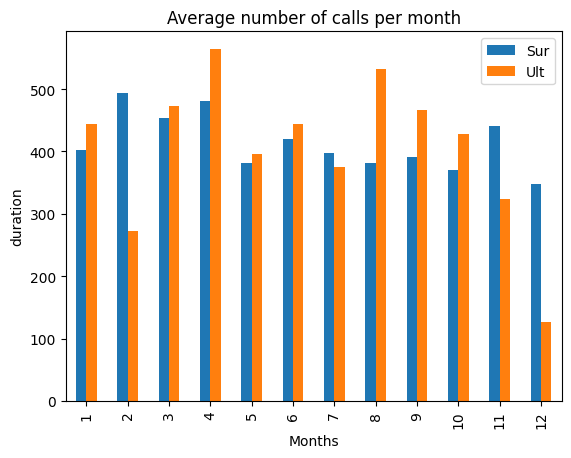

In [41]:
## Compare average duration of calls per each plan per each distinct month. Plotting a bar plat to visualize it.

avg_calls = merged_data.groupby(['plan','month'])['duration'].mean().unstack(level=0)
avg_calls

avg_calls.plot(
              kind='bar',
              stacked = False,
              title='Average number of calls per month',
              xlabel='Months',
              ylabel='duration')
                 
plt.legend(['Sur','Ult'])    
plt.show()

In [42]:
#### Average duration of calls is more for ultimate plan users is higher for about 8 months where as surf was more for 4 months.


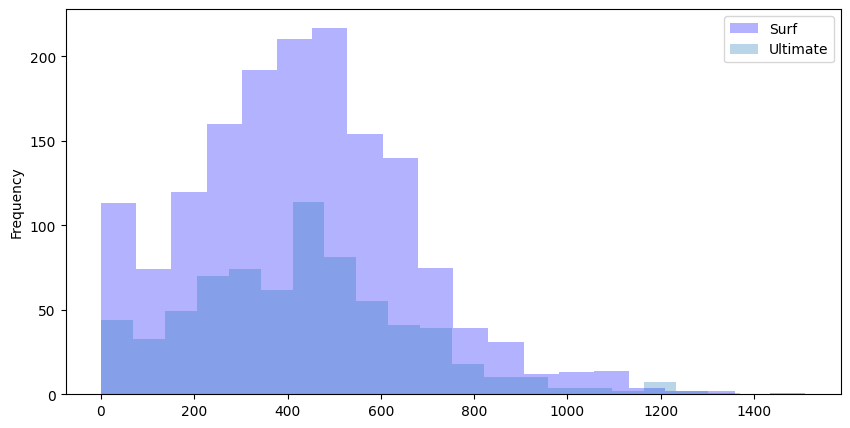

In [43]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.


users_surf= merged_data[merged_data['plan'] == 'surf']
users_ultimate = merged_data[merged_data['plan'] == 'ultimate']


users_surf['duration'].plot(kind='hist', x='month', bins=20, figsize=(10,5), color= ('blue'), alpha =0.3)
users_ultimate['duration'].plot(kind='hist',x='month', bins=20, figsize=(10,5),alpha=0.3)
plt.legend(['Surf','Ultimate'])
plt.show()


#### The number of minutes used by Surf plan user is way more than the ultimate users 

## [Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [44]:
# Calculate the mean and the variance of the monthly call duration

users_surf= merged_data[merged_data['plan'] == 'surf']['duration'].mean()
users_surf_var= merged_data[merged_data['plan'] == 'surf']['duration'].var()

users_ultimate = merged_data[merged_data['plan'] == 'ultimate']['duration'].mean()
users_ultimate_var= merged_data[merged_data['plan'] == 'ultimate']['duration'].var()

print("The mean for monthly call duration:", users_surf)
print("The variance for monthly call duration:", users_surf_var)
print("The mean for monthly call duration:", users_ultimate)
print("The variance for monthly call duration:", users_ultimate_var)

The mean for monthly call duration: 428.7495232040687
The variance for monthly call duration: 54968.27946065038
The mean for monthly call duration: 430.45
The variance for monthly call duration: 57844.46481223922


In [45]:
## Number of Calls made by each user per month

monthly_call_user = monthly_calls.merge(users, on = ['user_id', 'month'])
monthly_call_user

,user_id,month,call_date,duration,first_name,last_name,age,city,reg_date,plan
0,1000,12,16,124,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate
1,1001,8,27,182,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
2,1002,10,11,59,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf
3,1004,5,21,193,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf
4,1006,11,2,10,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate
...,...,...,...,...,...,...,...,...,...,...
235,1488,5,42,299,Shirley,Jones,29,"Baton Rouge, LA MSA",2018-05-15,surf
236,1491,4,8,44,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf
237,1495,9,52,302,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf
238,1497,12,54,300,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate


In [46]:
## Average duration of calls made by each user 

total_month_user = monthly_call_user.groupby(['user_id', 'plan']).agg({'month':'sum','duration':'sum'})
avg_user_duration = total_month_user['duration'] / total_month_user['month']
avg_user_duration

user_id  plan    
1000     ultimate     10.333333
1001     surf         22.750000
1002     surf          5.900000
1004     surf         38.600000
1006     ultimate      0.909091
                        ...    
1488     surf         59.800000
1491     surf         11.000000
1495     surf         33.555556
1497     ultimate     25.000000
1498     surf        122.000000
Length: 240, dtype: float64

<Figure size 1000x600 with 0 Axes>

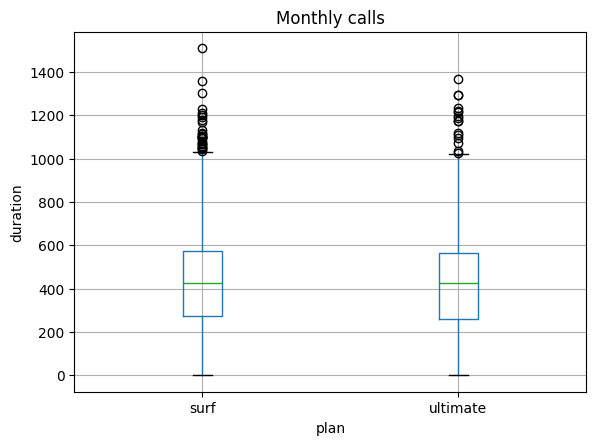

In [47]:
# Plot a boxplot to visualize the distribution of the monthly call duration

plt.figure(figsize=(10, 6))
merged_data.boxplot(column ='duration', by = 'plan')
plt.title('Monthly calls')
plt.xlabel('plan')
plt.ylabel('duration')
plt.suptitle('')
plt.show()



## Analysis of box plot 
#### In surf pre paid plan there is one value which is far from all the plot. It means surf prepaid plan has one user who does way more calls than other users. Most of the data for surface and ultimate plans lies 250 - 580 duration. There is one data in surf plan which is at extreme outliner as I see one data of the user is far away from other datas.



### Messages

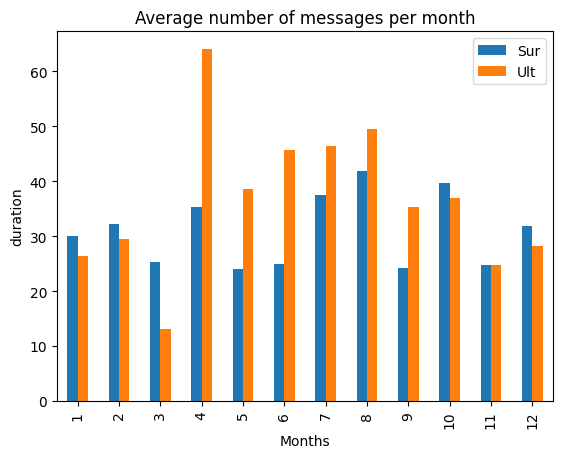

In [48]:
### Comparing the number of messages users of each plan tend to send each month

avg_messages = merged_data.groupby(['plan','month'])['id'].mean().unstack(level=0)
avg_messages

avg_messages.plot(
              kind='bar',
              stacked = False,
              title='Average number of messages per month',
              xlabel='Months',
              ylabel='duration')
                 
plt.legend(['Sur','Ult'])    
plt.show()




In [49]:
### Comparing the number of messages users of each plan tend to send each month

users_surf= merged_data[merged_data['plan'] == 'surf']['id'].mean()
users_surf_var= merged_data[merged_data['plan'] == 'surf']['id'].var()

users_ultimate = merged_data[merged_data['plan'] == 'ultimate']['id'].mean()
users_ultimate_var= merged_data[merged_data['plan'] == 'ultimate']['id'].var()

print("The mean for monthly messaging:", users_surf)
print("The variance for monthly messaging:", users_surf_var)
print("The mean for monthly  messaging:", users_ultimate)
print("The variance for monthly messaging:", users_ultimate_var)

The mean for monthly messaging: 31.15956770502225
The variance for monthly messaging: 1126.7245219504068
The mean for monthly  messaging: 37.55138888888889
The variance for monthly messaging: 1208.7567435481378


## Analysis of messages

#### Ultimate customers have higher amount of messaging from the month of April to September. Surf customers have higher amount of messaging from January to March & October & December.


In [50]:
# Comparing  the amount of internet traffic consumed by users per plan
internet_traffic = merged_data.groupby(['plan','user_id']).agg({'mb_used':'sum'})
internet_traffic


mb_used
plan     user_id           
surf     1001      80437.94
         1002      40293.33
         1003      27044.14
         1004     156352.81
         1005      17140.17
...                     ...
ultimate 1482      20806.13
         1487      13992.39
         1490     190904.51
         1493      76378.43
         1497      11106.55

[490 rows x 1 columns]

#### By this above data from both the plans it looks like more internet traffic for surf plan. It is little over double the ultimate plan. Which means either surf plan has more customers or same amount of customers are just using too much data.

### Internet

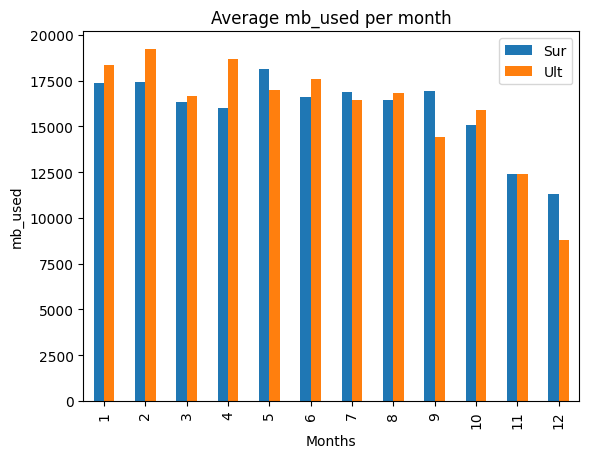

In [51]:
## Compare average mb_used per each plan per each distinct month. Plot a bar plat to visualize it.

avg_mb_used = merged_data.groupby(['plan','month'])['mb_used'].mean().unstack(level=0)
avg_mb_used

avg_mb_used.plot(
              kind='bar',
              stacked = False,
              title='Average mb_used per month',
              xlabel='Months',
              ylabel='mb_used')
                 
plt.legend(['Sur','Ult'])    
plt.show()

## Analysis Internet_traffic data 
##### While looking at the data between internet traffic between two datas. I noticed both plans are never same. It is always one more or less. The mean is higher for internet traffic for ultimate which can be that some of ultimate plan'scustomers are using internet for elongated period of time throughout whole year but  Surf plan customers on the other hand are more active during May, July, September and December.

In [52]:
 ## Calculated the mean and the variance of the monthly mb_used 

users_surf= merged_data[merged_data['plan'] == 'surf']['mb_used'].mean()
users_surf_var= merged_data[merged_data['plan'] == 'surf']['mb_used'].var()

users_ultimate = merged_data[merged_data['plan'] == 'ultimate']['mb_used'].mean()
users_ultimate_var= merged_data[merged_data['plan'] == 'ultimate']['mb_used'].var()

print("The mean for monthly internet used:", users_surf)
print("The variance for monthly internet used:", users_surf_var)
print("The mean for monthly internet used:", users_ultimate)
print("The variance for monthly internet used:", users_ultimate_var)



The mean for monthly internet used: 16558.283490146216
The variance for monthly internet used: 64216395.838027954
The mean for monthly internet used: 17214.699694444444
The variance for monthly internet used: 61652293.32385832


## Revenue

In [53]:
# Calculated the mean and the variance of the monthly revenue
users_surf= merged_data[merged_data['plan'] == 'surf']['monthly_revenue'].mean()
users_surf_var= merged_data[merged_data['plan'] == 'surf']['monthly_revenue'].var()

users_ultimate = merged_data[merged_data['plan'] == 'ultimate']['monthly_revenue'].mean()
users_ultimate_var= merged_data[merged_data['plan'] == 'ultimate']['monthly_revenue'].var()

print("The mean for monthly revenue used:", users_surf)
print("The variance for monthly revenue used:", users_surf_var)
print("The mean for monthly revenue used:", users_ultimate)
print("The variance for monthly revenue used:", users_ultimate_var)


The mean for monthly revenue used: 60.706408137317226
The variance for monthly revenue used: 3067.835152293878
The mean for monthly revenue used: 72.31388888888888
The variance for monthly revenue used: 129.8484855509195


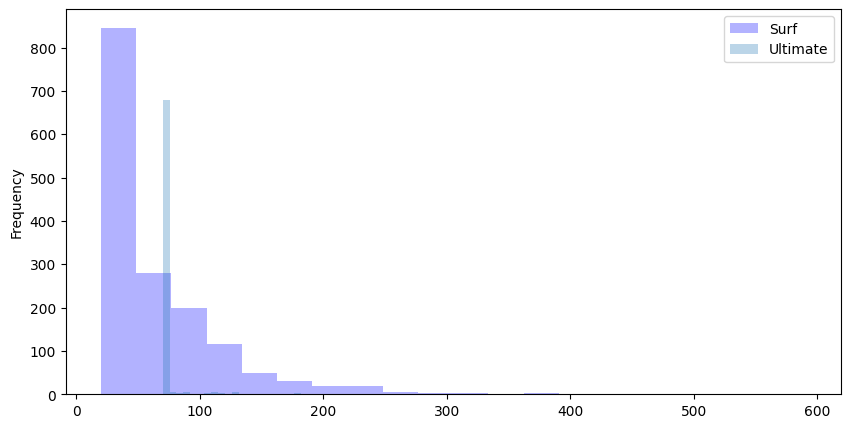

In [54]:
revenue_surf= merged_data[merged_data['plan'] == 'surf']
revenue_ultimate = merged_data[merged_data['plan'] == 'ultimate']

revenue_surf['monthly_revenue'].plot(kind='hist', x='month', bins=20, figsize=(10,5), color= ('blue'), alpha =0.3)
revenue_ultimate['monthly_revenue'].plot(kind='hist',x='month', bins=20, figsize=(10,5),alpha=0.3)
plt.legend(['Surf','Ultimate'])
plt.show()



#### It looks like the Surf plan created more for revenue Mega line telecom in 2018. 

## Test statistical hypotheses

In [55]:
# Test the hypotheses

sample_surf = merged_data[merged_data['plan'] == 'surf']['monthly_revenue']
sample_ultimate = merged_data[merged_data['plan'] == 'ultimate']['monthly_revenue']

alpha = 0.05 # setting a critical statistical significance level

tstat, pvalue = st.ttest_ind(sample_surf, sample_ultimate)


print('p-value:', pvalue)

if pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 2.862674510698644e-08
We reject the null hypothesis


#### I did hypothesis test to find if average revenue from created by Surf and Ultimate plan users. Our null hypotheses is that the average revenue created by both plans  are same. Our alternative hypothesis is that it is not same. We did realize that as our pvalue is less than alpha so we reject the null hypothesis. By this hypothesis we dont know if it is more or less.

In [56]:
# Testing the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

contains_NY_NJ = merged_data[merged_data['city'].str.contains('NY-NJ')]['monthly_revenue']

contains_others = merged_data[~merged_data['city'].str.contains('NY-NJ')]['monthly_revenue']

alpha = 0.05 # setting a critical statistical significance level

tstat, pvalue = st.ttest_ind(contains_NY_NJ, contains_others)


print('p-value:', pvalue)

if pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.04355743162134274
We reject the null hypothesis


### I did hypothesis test to find if average revenue from user in NY-NJ is different from the other regions. Our null hypotheses is that the avaerage revenue of NY_ NJ users and other regions are same. Our alternative hypothesis is that it is not same. We did realize that as our pvalue is less than alpha so we reject the null hypothesis. We dont know if the average revenue for NY-NJ is more or less.



## General conclusion

#### I think Surf is the better prepaid plan for Megaline telecom company as it creates more revenue so if they can keep those customers happier and investigate on which areas to advertise for ultimate plan users. It is almost double. For Surf customers the company should inform them about loyalty programs, referral discounts, birthday messages as we do not want to loose them.  For Ultimate customers we need to conduct feddback session so we can understand why we have lower customer base. We need to investigate our target audience maybe we are pitching this product to wrong market. When I looked at the churn_data I did found out that surf is better suited for students and ultimate plan is more beneficial for 30 yrs + adults.


#### Users data
###### We should look into our churn_date in our user columns in future to see why these customers have stopped using our prepaid plan. Maybe they just switched plan with our company but in case this is not the reason then we need to investigate more later on to figure out why did they left our company and if we have to use different advertising channels in those area


#### Internet_traffic data
###### While looking at the data between internet traffic between two datas.  The mean is higher for internet traffic for ultimate which can be that some of ultimate plan'scustomers are using internet for elongated period of time throughout whole year but Surf plan customers on the other hand are more active during May, July, September and December.It could be because of the holidays maybe they are on social media a lot more than usual or they are meeting with families and streaming shows or movies together.


#### Call data
###### By the mean of call data I realized that the mean is higher in the ultimate plan for 8 months that means customer spend more time on calls than in Surf plan maybe the customers who like to chat over phone for longer time uses ultimate plan.